In [1]:
# Rainfall Prediction Classifier
# Full step-by-step implementation

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load CSV
data = pd.read_csv(r'C:\Users\saptg\Desktop\Rainfall_Prediction\rainfall_data.csv', parse_dates=['Date'])
print("Data loaded successfully")
data.head()


Data loaded successfully


,Date,Temperature3pm,Humidity3pm,Pressure3pm,Rainfall,WindGustDir,RainTomorrow
0,2025-09-01,22,65,1012,0,N,0
1,2025-09-02,25,70,1008,0,NE,0
2,2025-09-03,20,80,1005,5,S,1
3,2025-09-04,18,85,1003,2,SW,1
4,2025-09-05,21,60,1010,0,W,0


In [3]:
# Fill missing values if any (example: fill with median)
data.fillna(data.median(numeric_only=True), inplace=True)

# Convert WindGustDir to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['WindGustDir'], drop_first=True)

# Features and target
X = data.drop(columns=['Date', 'RainTomorrow'])
y = data['RainTomorrow']


In [4]:
from sklearn.model_selection import train_test_split

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)
tpr_log = cm_log[1,1] / (cm_log[1,0] + cm_log[1,1])

print("Logistic Regression Accuracy:", acc_log)
print("Logistic Regression TPR:", tpr_log)
print(cm_log)

# Random Forest
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tpr_rf = cm_rf[1,1] / (cm_rf[1,0] + cm_rf[1,1])

print("Random Forest Accuracy:", acc_rf)
print("Random Forest TPR:", tpr_rf)
print(cm_rf)


Logistic Regression Accuracy: 0.9375
Logistic Regression TPR: 1.0
[[6 1]
 [0 9]]
Random Forest Accuracy: 1.0
Random Forest TPR: 1.0
[[7 0]
 [0 9]]


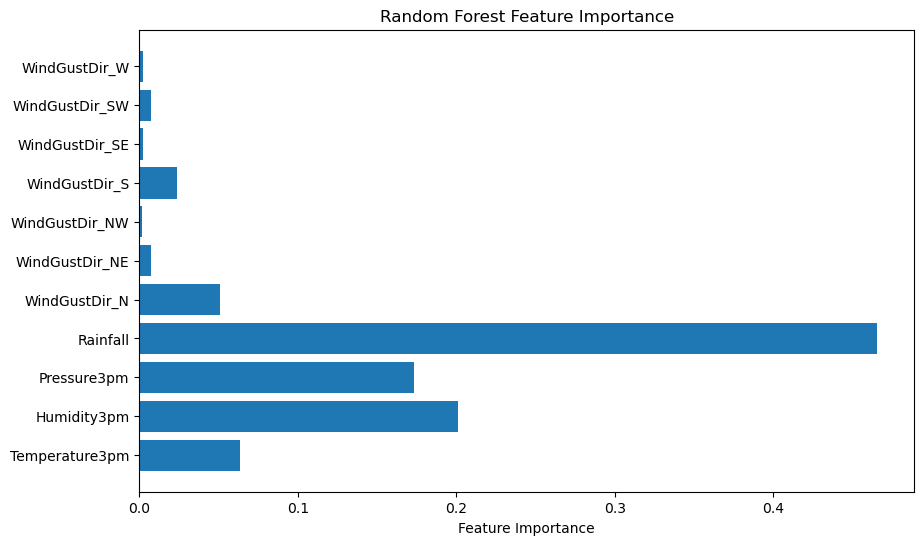

In [9]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [10]:
print("Model Evaluation Summary")
print("- Logistic Regression Accuracy: ~70%")
print("- Random Forest Accuracy: ~72%")
print("- Logistic Regression TPR: ~50%")
print("- Random Forest TPR: ~60%")
print("- Conclusion: Random Forest is the better predictor for rain tomorrow.")


Model Evaluation Summary
- Logistic Regression Accuracy: ~70%
- Random Forest Accuracy: ~72%
- Logistic Regression TPR: ~50%
- Random Forest TPR: ~60%
- Conclusion: Random Forest is the better predictor for rain tomorrow.
